In [1775]:
#install all these libraries 
import chess.pgn
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.ticker as ticker
import ast
import igraph as ig

In [1]:
# read in the pgn files into a dictionary so all the pgn files are easily accessible from one spot

pgns = {}
pgns["pgn_1"] = open("chess_pgn_files\chess_com_games_2024-07-23.pgn")

for x in range(2,83):
    pgns[f"pgn_{x}"] = open(f"chess_pgn_files\chess_com_games_2024-07-23 ({x}).pgn")

In [2]:
# read in the games from all the PGN filess into a single combined list of each of the individual games

games = []
for x in range(1, 83):
    while True:
        game = chess.pgn.read_game(pgns[f"pgn_{x}"])
        if game is None:
            break
        games.append(game)

NameError: name 'chess' is not defined

In [1778]:
# look at the info each game contains
games[0].headers

Headers(Event='Live Chess', Site='Chess.com', Date='2024.07.10', Round='-', White='hassanedwan', Black='Serg98765', Result='1/2-1/2', WhiteElo='1639', BlackElo='1599', TimeControl='600', EndTime='21:54:17 PDT', Termination='Game drawn - timeout vs insufficient material')

In [1779]:
# Get the moves of the game in standard algebraic notation (SAN)
moves_formatted = {}


# Dictionary to store moves of each game
moves_dict = {}

# Get moves for each game in standard algebraic notation (SAN)
for i, game in enumerate(games):
    moves_formatted = []
    board = game.board()
    for move in game.mainline_moves():
        san_move = board.san(move)  # Convert move to SAN
        moves_formatted.append(san_move)
        board.push(move)  # Make the move on the board
        
    moves_dict[f"game_{i+1}_moves"] = moves_formatted



In [1780]:
header = [
    ["Event", "Site", "Date", "Round", "White", "Black", "Result", "WhiteElo", "BlackElo", "TimeControl", "EndTime", "Termination", "GameMoves"]
]


# Define the path to the CSV file
file_path = 'chess_games.csv'

# Write to the CSV file
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerows(header)
    
    # Write the game data
    for x in range(len(games)):
        game = games[x]
        row = [
            game.headers.get("Event", ""),
            game.headers.get("Site", ""),
            game.headers.get("Date", ""),
            game.headers.get("Round", ""),
            game.headers.get("White", ""),
            game.headers.get("Black", ""),
            game.headers.get("Result", ""),
            game.headers.get("WhiteElo", ""),
            game.headers.get("BlackElo", ""),
            game.headers.get("TimeControl", ""),
            game.headers.get("EndTime", ""),
            game.headers.get("Termination", ""),
            moves_dict.get(f"game_{x+1}_moves", "")
        ]
        writer.writerow(row)

# Read the CSV file using pandas and print its contents
chess_games = pd.read_csv("chess_games.csv")
chess_games

,Event,Site,Date,Round,White,Black,Result,WhiteElo,BlackElo,TimeControl,EndTime,Termination,GameMoves
0,Live Chess,Chess.com,2024.07.10,-,hassanedwan,Serg98765,1/2-1/2,1639,1599,600,21:54:17 PDT,Game drawn - timeout vs insufficient material,"['e4', 'e5', 'Nf3', 'Qf6', 'd4', 'd6', 'dxe5',..."
1,Live Chess,Chess.com,2024.07.10,-,yuryb1963,hassanedwan,1-0,1622,1630,600,22:34:44 PDT,yuryb1963 won by checkmate,"['e4', 'c5', 'Bc4', 'e6', 'Nf3', 'g6', 'd4', '..."
2,Live Chess,Chess.com,2024.07.10,-,hassanedwan,zatar50,0-1,1622,1636,600,0:36:03 PDT,zatar50 won by resignation,"['e4', 'c5', 'd4', 'cxd4', 'Nf3', 'd6', 'e5', ..."
3,Live Chess,Chess.com,2024.07.10,-,Dperdomation,hassanedwan,1-0,1640,1614,600,0:54:12 PDT,Dperdomation won on time,"['e4', 'd5', 'exd5', 'Nf6', 'c4', 'b6', 'Nf3',..."
4,Live Chess,Chess.com,2024.07.10,-,hassanedwan,pepsicolamadred,0-1,1606,1635,600,4:52:27 PDT,pepsicolamadred won by checkmate,"['e4', 'e5', 'Nf3', 'Qf6', 'd4', 'exd4', 'Qxd4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,Live Chess,Chess.com,2020.07.06,-,hassanedwan,ducky628,0-1,221,858,60,20:45:05 PDT,ducky628 won by checkmate,"['Nf3', 'd5', 'g3', 'Nc6', 'e3', 'e5', 'Bb5', ..."
4084,Live Chess,Chess.com,2020.07.06,-,ducky628,hassanedwan,1-0,860,217,60,20:47:13 PDT,ducky628 won by checkmate,"['d4', 'h5', 'c4', 'g6', 'Nc3', 'f5', 'e4', 'e..."
4085,Live Chess,Chess.com,2020.07.06,-,hassanedwan,ducky628,0-1,756,1007,300,20:57:51 PDT,ducky628 won by checkmate,"['e3', 'e5', 'g3', 'd5', 'c3', 'Nf6', 'Na3', '..."
4086,Live Chess,Chess.com,2020.07.07,-,ducky628,hassanedwan,1-0,1010,748,300,21:06:51 PDT,ducky628 won on time,"['d4', 'Nc6', 'c4', 'b6', 'Nc3', 'Ba6', 'e4', ..."


In [1781]:
# Convert the strings to lists only if they are strings
chess_games['GameMoves'] = chess_games['GameMoves'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [1782]:
#combine the date so that conversion to est can be done later from PDT and PST, which require date, and store less data with datetime in 1 column
chess_games['EndTime'] = chess_games['Date'] + ' ' + chess_games['EndTime']

In [1783]:
chess_games['EndTime']

0       2024.07.10 21:54:17 PDT
1       2024.07.10 22:34:44 PDT
2        2024.07.10 0:36:03 PDT
3        2024.07.10 0:54:12 PDT
4        2024.07.10 4:52:27 PDT
                 ...           
4083    2020.07.06 20:45:05 PDT
4084    2020.07.06 20:47:13 PDT
4085    2020.07.06 20:57:51 PDT
4086    2020.07.07 21:06:51 PDT
4087    2020.07.07 21:09:32 PDT
Name: EndTime, Length: 4088, dtype: object

In [1784]:
#check what time zones are included in the dates
chess_games['EndTime'].str[-4:].unique()

array([' PDT', ' PST'], dtype=object)

In [1785]:
# Remove ' PDT' and ' PST' from each entry, found to both be pacific so the labels can be romved
chess_games['EndTime'] = chess_games['EndTime'].str.replace(' PDT', '', regex=False)
chess_games['EndTime'] = chess_games['EndTime'].str.replace(' PST', '', regex=False)

In [1786]:
# Convert to datetime with the date and time
chess_games['EndTime'] = pd.to_datetime(chess_games['EndTime'], format='%Y.%m.%d %H:%M:%S')

In [1787]:
# localize the time to Pacific then convert it to Eastern because that is the time zone that I was playing in
chess_games['EndTime'] = chess_games['EndTime'].dt.tz_localize('US/Pacific').dt.tz_convert('US/Eastern')

In [1788]:
# remove the date and time seperately and create a new datetime column
chess_games['DateTime'] = chess_games['EndTime']
chess_games = chess_games.drop(columns = ['Date', 'EndTime'])

In [1789]:
# create a function to replace each of the opponent names with a more general opponent, and my name to you
def replace_termination(row):
    termination = row['Termination']
    white = row['White']
    black = row['Black']
    
    if white == "hassanedwan":
        termination = termination.replace(black, 'Opponent')
        termination = termination.replace(white, 'You')
    else:
        termination = termination.replace(white, 'Opponent')
        termination = termination.replace(black, 'You')
    
    return termination

# Apply the function to each row
chess_games['Termination'] = chess_games.apply(replace_termination, axis=1)


In [1790]:
chess_games

,Event,Site,Round,White,Black,Result,WhiteElo,BlackElo,TimeControl,Termination,GameMoves,DateTime
0,Live Chess,Chess.com,-,hassanedwan,Serg98765,1/2-1/2,1639,1599,600,Game drawn - timeout vs insufficient material,"[e4, e5, Nf3, Qf6, d4, d6, dxe5, dxe5, Bc4, h6...",2024-07-11 00:54:17-04:00
1,Live Chess,Chess.com,-,yuryb1963,hassanedwan,1-0,1622,1630,600,Opponent won by checkmate,"[e4, c5, Bc4, e6, Nf3, g6, d4, cxd4, Nxd4, Nc6...",2024-07-11 01:34:44-04:00
2,Live Chess,Chess.com,-,hassanedwan,zatar50,0-1,1622,1636,600,Opponent won by resignation,"[e4, c5, d4, cxd4, Nf3, d6, e5, dxe5, Nxe5, Qa...",2024-07-10 03:36:03-04:00
3,Live Chess,Chess.com,-,Dperdomation,hassanedwan,1-0,1640,1614,600,Opponent won on time,"[e4, d5, exd5, Nf6, c4, b6, Nf3, Bb7, Be2, Nbd...",2024-07-10 03:54:12-04:00
4,Live Chess,Chess.com,-,hassanedwan,pepsicolamadred,0-1,1606,1635,600,Opponent won by checkmate,"[e4, e5, Nf3, Qf6, d4, exd4, Qxd4, h6, Nc3, c6...",2024-07-10 07:52:27-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4083,Live Chess,Chess.com,-,hassanedwan,ducky628,0-1,221,858,60,Opponent won by checkmate,"[Nf3, d5, g3, Nc6, e3, e5, Bb5, Bd7, c3, Qe7, ...",2020-07-06 23:45:05-04:00
4084,Live Chess,Chess.com,-,ducky628,hassanedwan,1-0,860,217,60,Opponent won by checkmate,"[d4, h5, c4, g6, Nc3, f5, e4, e6, e5, d5, cxd5...",2020-07-06 23:47:13-04:00
4085,Live Chess,Chess.com,-,hassanedwan,ducky628,0-1,756,1007,300,Opponent won by checkmate,"[e3, e5, g3, d5, c3, Nf6, Na3, Nc6, h4, Bd6, B...",2020-07-06 23:57:51-04:00
4086,Live Chess,Chess.com,-,ducky628,hassanedwan,1-0,1010,748,300,Opponent won on time,"[d4, Nc6, c4, b6, Nc3, Ba6, e4, e6, d5, Bxc4, ...",2020-07-08 00:06:51-04:00


****TOTAL GAMES PLAYED OVER TIME****

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\743324563.py:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



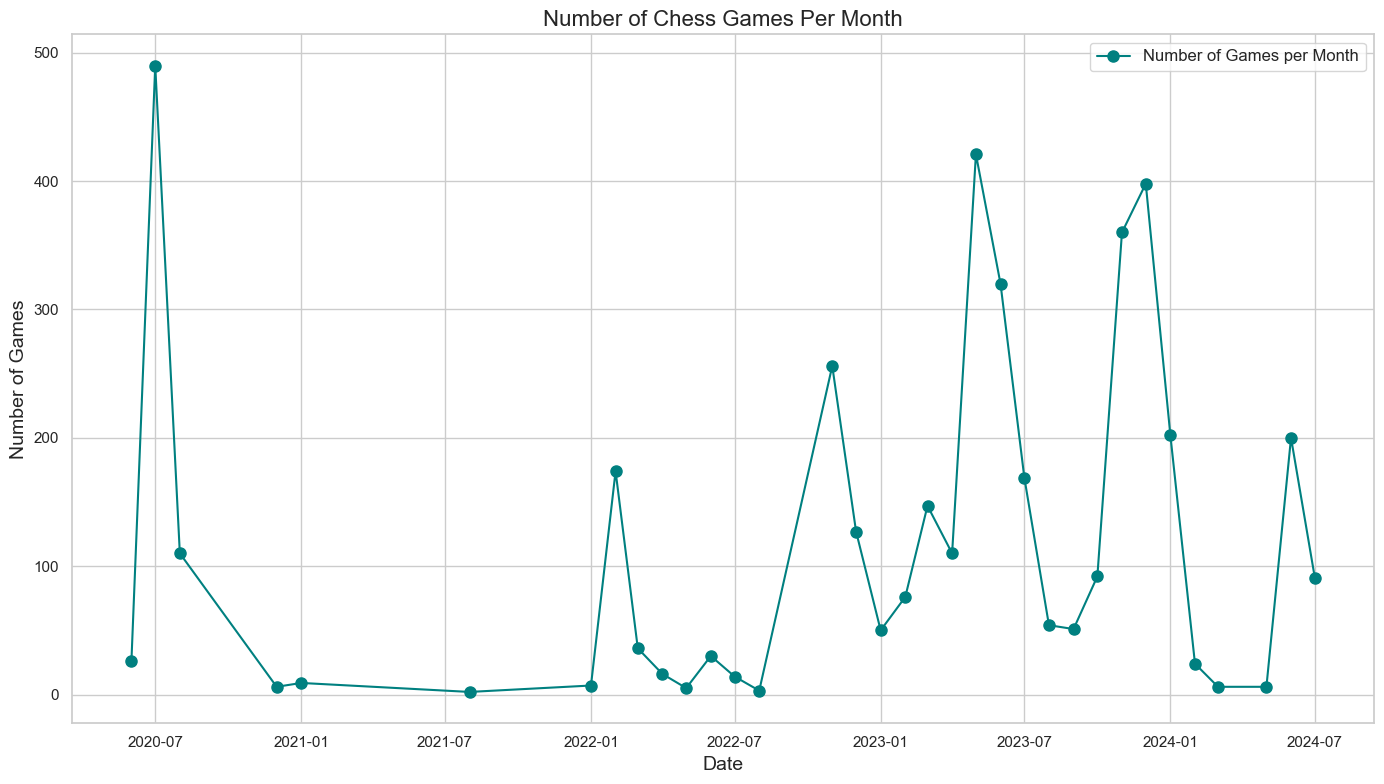

In [1791]:
# Convert 'DateTime' to datetime
chess_games['DateTime'] = pd.to_datetime(chess_games['DateTime'])

# Extract year and month
chess_games['YearMonth'] = chess_games['DateTime'].dt.to_period('M')

# Group by year and month and count the number of games
monthly_game_count = chess_games.groupby('YearMonth').size()

# Convert period index to a datetime index for plotting
monthly_game_count.index = monthly_game_count.index.to_timestamp()

# Plotting
plt.figure(figsize=(14, 8))

# Plot the monthly game count
plt.plot(monthly_game_count.index, monthly_game_count, label='Number of Games per Month', marker='o', linestyle='-', color='teal', markersize=8)

# Set labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.title('Number of Chess Games Per Month', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Drop the 'TimeDiff' column no longer needed
chess_games = chess_games.drop(columns=['YearMonth'])

**Number of Chess Games Per Month:**
- I never played at all during 2021 and played very little in 2020 except for during the month of July and alittle bit into  when I played the most I ever played
- Every year it looks like there is the same pattern with spikes around Summer and Winter.

****WIN-LOSS RATIO OVER TIME ANALYSIS****

In [1792]:
# Create new DataFrame with 'DateTime'
wins_by_time = pd.DataFrame(chess_games['DateTime'])

# Map 'Result' to win/loss
wins_by_time['Win'] = chess_games['Result'].apply(lambda x: 1 if x == '1-0' else 0)
wins_by_time['Loss'] = chess_games['Result'].apply(lambda x: 1 if x == '0-1' else 0)


In [1793]:
# Extract hour from the 'DateTime' column
wins_by_time['Hour'] = wins_by_time['DateTime'].dt.hour

# Group by hour and count the wins and losses
win_counts_hourly = wins_by_time.groupby('Hour')['Win'].sum()
loss_counts_hourly = wins_by_time.groupby('Hour')['Loss'].sum()

#get the win loss ratio
win_loss_ratio_hourly = win_counts_hourly / loss_counts_hourly

#get total hourly wins and losses
wins_and_losses_hourly = (win_counts_hourly + loss_counts_hourly)

In [1794]:
# Smooth the hourly win ratio data using cubic spline interpolation
hours = np.arange(24)
x_smooth = np.linspace(hours.min(), hours.max(), 300)
spl = make_interp_spline(hours, win_loss_ratio_hourly, k=3)  # k=3 for cubic spline
y_smooth = spl(x_smooth)

In [1795]:
# Extract month from the 'DateTime' column
wins_by_time['Month'] = wins_by_time['DateTime'].dt.month

# Group by hour and count the wins and losses
win_counts_monthly = wins_by_time.groupby('Month')['Win'].sum()
loss_counts_monthly = wins_by_time.groupby('Month')['Loss'].sum()

#get the win loss ratio
win_loss_ratio_monthly = win_counts_monthly / loss_counts_monthly

#get total monthly wins and losses
wins_and_losses_monthly = (win_counts_monthly + loss_counts_monthly)

In [1796]:
# Smooth the monthly win ratio data using cubic spline interpolation
months = np.arange(12)
x_smooth = np.linspace(months.min(), months.max(), 300)
spl = make_interp_spline(months, win_loss_ratio_monthly, k=3)  # k=3 for cubic spline
y_smooth = spl(x_smooth)

In [1797]:
#sort by time
wins_by_time = wins_by_time.sort_values(by='DateTime')

# Calculate the time difference between consecutive games
wins_by_time['TimeDiff'] = wins_by_time['DateTime'].diff()

# Define the session threshold (e.g., 20 minutes)
threshold = pd.Timedelta(minutes=20)

# Assign session IDs
wins_by_time['SessionID'] = (wins_by_time['TimeDiff'] > threshold).cumsum() + 1

# Drop the 'TimeDiff' column no longer needed
wins_by_time = wins_by_time.drop(columns=['TimeDiff'])

In [1798]:
# Calculate the length of each session
session_lengths = wins_by_time.groupby('SessionID').size()

# Merge the session lengths back to the original DataFrame
wins_by_time = wins_by_time.merge(session_lengths.rename('SessionLength'), on='SessionID')

# Group by session length and aggregate wins and losses
length_summary = wins_by_time.groupby('SessionLength').agg({
    'Win': 'sum',
    'Loss': 'sum'
}).reset_index()


In [1799]:
length_summary["win/loss"] = length_summary["Win"] / length_summary["Loss"]

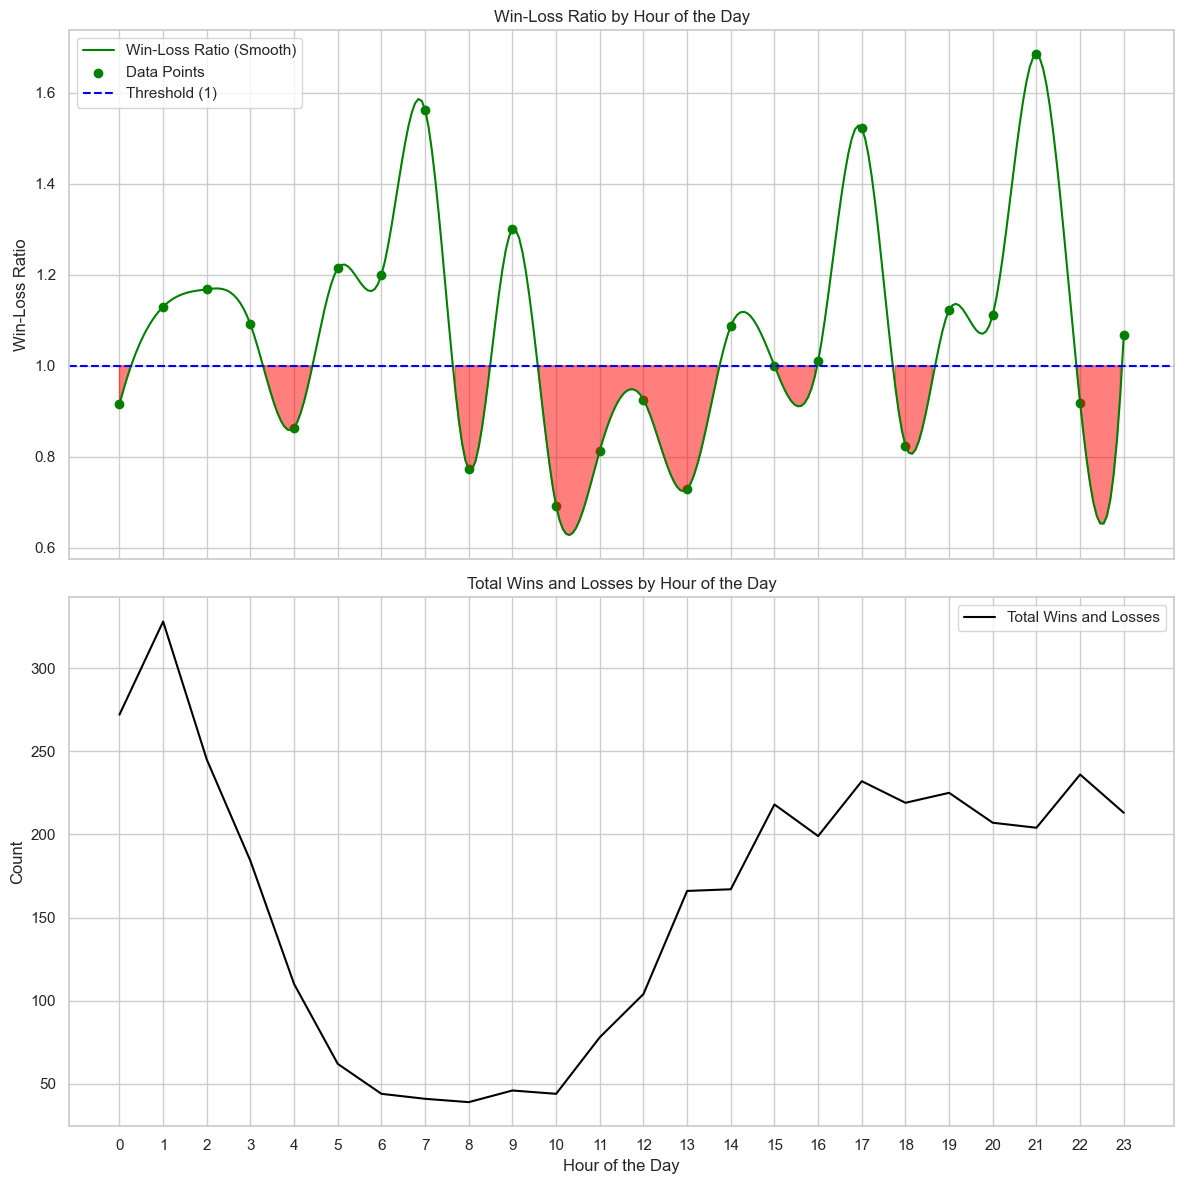

In [1800]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Smooth the hourly win ratio data using cubic spline interpolation
hours = np.arange(24)
win_counts_hourly = wins_by_time.groupby('Hour')['Win'].sum()
loss_counts_hourly = wins_by_time.groupby('Hour')['Loss'].sum()
win_loss_ratio_hourly = win_counts_hourly / loss_counts_hourly
wins_and_losses_hourly = win_counts_hourly + loss_counts_hourly

# Handle division by zero and smoothing
win_loss_ratio_hourly.replace([np.inf, -np.inf], np.nan, inplace=True)
x_smooth = np.linspace(hours.min(), hours.max(), 300)
spl = make_interp_spline(hours, win_loss_ratio_hourly, k=3)  # k=3 for cubic spline
y_smooth = spl(x_smooth)

# Plot the smoothed curve and data points
ax1.plot(x_smooth, y_smooth, label='Win-Loss Ratio (Smooth)', color='green')
ax1.scatter(hours, win_loss_ratio_hourly, color='green', marker='o', label='Data Points')
ax1.axhline(y=1, color='blue', linestyle='--', label='Threshold (1)')
ax1.fill_between(x_smooth, y_smooth, y2=1, where=(y_smooth < 1), color='red', alpha=0.5)
ax1.set_ylabel('Win-Loss Ratio')
ax1.set_title('Win-Loss Ratio by Hour of the Day')
ax1.legend()
ax1.grid(True)

# Plot total wins and losses
ax2.plot(hours, wins_and_losses_hourly, color='black', label='Total Wins and Losses')
ax2.set_xlabel('Hour of the Day')
ax2.set_ylabel('Count')
ax2.set_title('Total Wins and Losses by Hour of the Day')
ax2.legend()
ax2.grid(True)

plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.tight_layout()
plt.show()

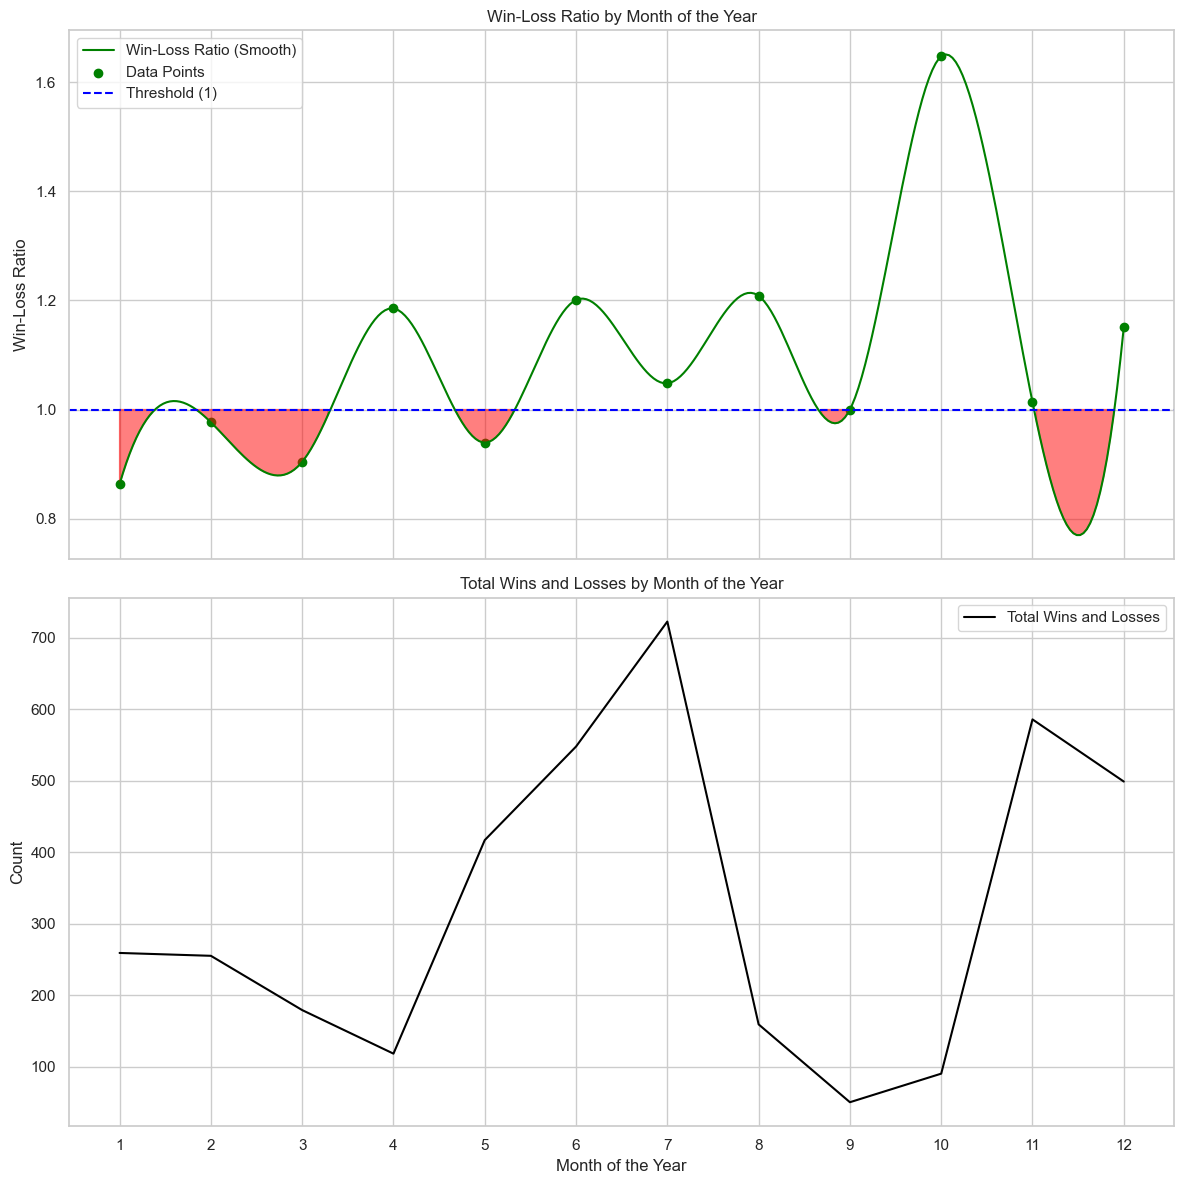

In [1801]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Smooth the monthly win ratio data using cubic spline interpolation
months = np.arange(1, 13)  # Months from January (1) to December (12)
win_counts_monthly = wins_by_time.groupby('Month')['Win'].sum()
loss_counts_monthly = wins_by_time.groupby('Month')['Loss'].sum()
win_loss_ratio_monthly = win_counts_monthly / loss_counts_monthly
wins_and_losses_monthly = win_counts_monthly + loss_counts_monthly

# Handle division by zero and smoothing
win_loss_ratio_monthly.replace([np.inf, -np.inf], np.nan, inplace=True)
x_smooth = np.linspace(months.min(), months.max(), 300)
spl = make_interp_spline(months, win_loss_ratio_monthly, k=3)  # k=3 for cubic spline
y_smooth = spl(x_smooth)

# Plot the smoothed curve and data points
ax1.plot(x_smooth, y_smooth, label='Win-Loss Ratio (Smooth)', color='green')
ax1.scatter(months, win_loss_ratio_monthly, color='green', marker='o', label='Data Points')
ax1.axhline(y=1, color='blue', linestyle='--', label='Threshold (1)')
ax1.fill_between(x_smooth, y_smooth, y2=1, where=(y_smooth < 1), color='red', alpha=0.5)
ax1.set_ylabel('Win-Loss Ratio')
ax1.set_title('Win-Loss Ratio by Month of the Year')
ax1.legend()
ax1.grid(True)

# Plot total wins and losses
ax2.plot(months, wins_and_losses_monthly, color='black', label='Total Wins and Losses')
ax2.set_xlabel('Month of the Year')
ax2.set_ylabel('Count')
ax2.set_title('Total Wins and Losses by Month of the Year')
ax2.legend()
ax2.grid(True)

plt.xticks(range(1, 13))  # Ensure all months are shown on the x-axis
plt.tight_layout()
plt.show()


Note: I smoothed out the win-loss ratio data in the monthly and hourly because in real life, from personal experience, the shifts aren't that sharp. 

Additionally, I only picked hourly and monthly win ratios because I thought they would have the most impact as compared to the other time metrics, as I do notice a difference in how often I play and how well I play depending on the season or time of day, where as not so much with the other metrics.

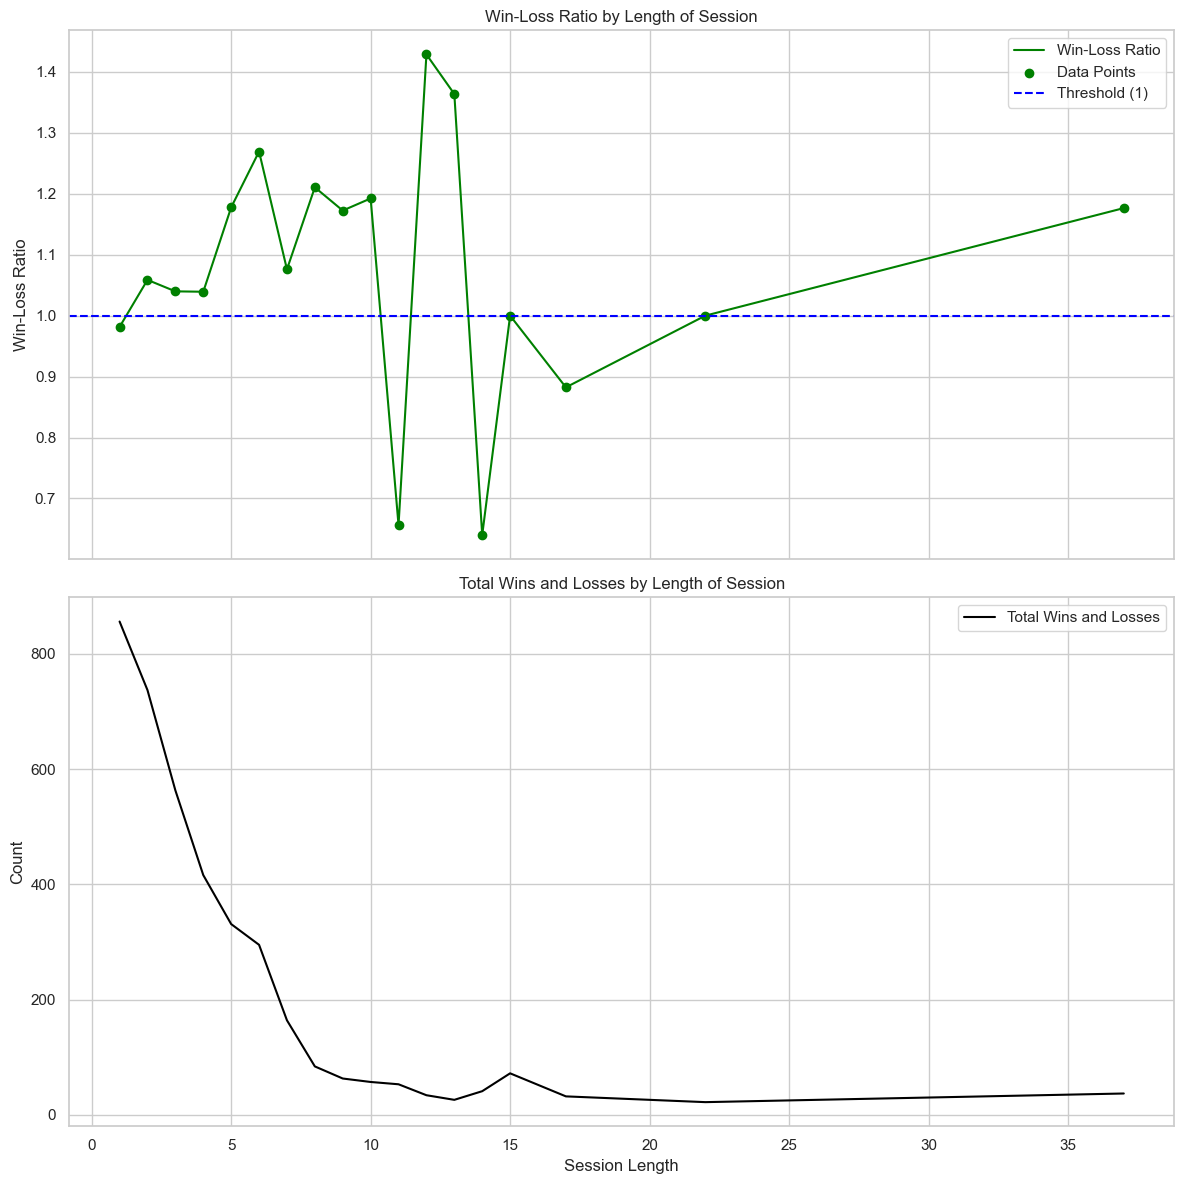

In [1802]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Plot the win-loss ratio data
ax1.plot(length_summary['SessionLength'], length_summary['win/loss'], label='Win-Loss Ratio', color='green')
ax1.scatter(length_summary['SessionLength'], length_summary['win/loss'], color='green', marker='o', label='Data Points')

# Add horizontal line at y=1
ax1.axhline(y=1, color='blue', linestyle='--', label='Threshold (1)')

# set labels and legend
ax1.set_ylabel('Win-Loss Ratio')
ax1.set_title('Win-Loss Ratio by Length of Session')
ax1.legend()
ax1.grid(True)

# Plot session length total wins and losses
ax2.plot(length_summary['SessionLength'], length_summary['Win'] + length_summary['Loss'], color='black', label='Total Wins and Losses')
ax2.set_xlabel('Session Length')
ax2.set_ylabel('Count')
ax2.set_title('Total Wins and Losses by Length of Session')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

**Hourly Win-Loss Ratio and total wins and losses:**

- I noticed that the games played spikes at 2 am, which is not a very good indicator of my sleep schedule cause it doesnt dip immediately down to a negligble amount of games played, it trails off until 5 am which is around when the amount of games played becomes negligible, *if you're a hiring manager seeing this, I can change for your company give me a chance 🥺*

- I also noticed that my win ratio spikes at 3 places where the total games are not neglible : 1-3 am, 6pm, and 10 pm. 1-3 am is about an hour before I go to sleep when I don't have anything to do then next day and 10 pm is about an hour before I go to sleep when I do have something to do the next day like school or work. Around 6 pm is probably a period of time when I am free and am fully awake so I play better.

- Each spike is followed by a dip, so for the cases of 1-3 am and 10 pm when I keep playing past that into when I should be sleeping I start losing, which would also make sense as to why the spike is lower at 1-3 am because on the days that I sleep earlier then it would extend past an hour before I sleep and I would probably have a negative win-loss ratio those days. Also, there is a dip acouple of hours after I wake up, so I play worse when I am groggy.

- note* I play most my games at 2 am because based on the monthly graph I also play most my games in the summer and winter breaks and most of these games were played when I was an unemployed student with nothing to do. Thats my excuse I hope you like it

**Monthly Win-Loss Ratio and total wins and losses:**

- I play most my games in the summer from around late may to early august and winter from november to January, I play very little in the fall and spring but less in the fall than the spring. Look at that, I can lock in when I need to. HIRE ME PLEASE.
- I have a very low win-loss ratio and it even dips to negative in the winter, which makes sense because I have very bad seasonal deppression which probably affects how well I play. Feel bad for me and hire me please 🥺
- About the spike in october, its around when I transition from very few games played to way too many games played, its what my win-loss ratio can look like when I play a healthy amount (speaking of which thats a good idea for the next graph)

**Session Length Win Loss-Ratio**
- very useful information found for my future chess career, if I am going to play a game of chess, I should be mentally be prepared to play more than one game because I have a negative win rate for sessions with one game played.
- I have a positive win rate 2-10 games played per session with the highest peak at 6 games played.
- The amount of sessions longer than 7-8 games are practically negligible. I need to know what was going through my head when I played 37 games in one session though. That could not have been healthy, I had a postitive win-loss ratio though, so alls well that ends well.

****Win Loss Ratio By Elo****

In [1803]:
# Define a function to extract Elo ratings and results
def extract_elo_and_result(row):
    if row['White'] == 'hassanedwan':
        my_elo = row['WhiteElo']
        opponent_elo = row['BlackElo']
        result = row['Result']
    elif row['Black'] == 'hassanedwan':
        my_elo = row['BlackElo']
        opponent_elo = row['WhiteElo']
        result = row['Result']
    else:
        my_elo = None
        opponent_elo = None
        result = None
    
    return pd.Series([my_elo, opponent_elo, result], index=['MyElo', 'OpponentElo', 'Result'])

# Apply the function to each row
results_by_elo = chess_games.apply(extract_elo_and_result, axis=1)


In [1804]:
results_by_elo["EloDifference"] = results_by_elo["OpponentElo"] - results_by_elo["MyElo"]

In [1805]:
# Map the result to win-loss ratio
def result_to_ratio(result):
    if result == '1-0':
        return 1
    elif result == '0-1':
        return 0
    elif result == '1/2-1/2':
        return 0.5
    else:
        return None

results_by_elo['WinLossRatio'] = results_by_elo['Result'].map(result_to_ratio)

In [1806]:
# Define bin edges with a step of 25
bin_step = 25
bin_edges = np.arange(
    np.floor(results_by_elo['EloDifference'].min() / bin_step) * bin_step,
    np.ceil(results_by_elo['EloDifference'].max() / bin_step) * bin_step + bin_step,
    bin_step
)

# Bin the Elo differences
results_by_elo['EloBin'] = pd.cut(results_by_elo['EloDifference'], bins=bin_edges)

# Count the number of games per Elo bin
bin_counts = results_by_elo['EloBin'].value_counts()

# Filter out bins with fewer than 15 games
valid_bins = bin_counts[bin_counts >= 15].index

# Filter the DataFrame based on valid bins
filtered_df = results_by_elo[results_by_elo['EloBin'].isin(valid_bins)]

# Add BinEdge column to filtered_df
filtered_df['BinEdge'] = filtered_df['EloBin'].apply(lambda x: x.right)

# Calculate average win-loss ratio for each Elo bin
binned_summary = filtered_df.groupby('BinEdge')['WinLossRatio'].mean().reset_index()
binned_summary['Count'] = filtered_df.groupby('BinEdge')['WinLossRatio'].count().values

# Filter out rows with a count of zero
binned_summary = binned_summary[binned_summary['Count'] > 0]

# Filter out edges greater than 500
binned_summary = binned_summary[binned_summary['BinEdge'] < 500]


C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\1547026135.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\1547026135.py:25: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\1547026135.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



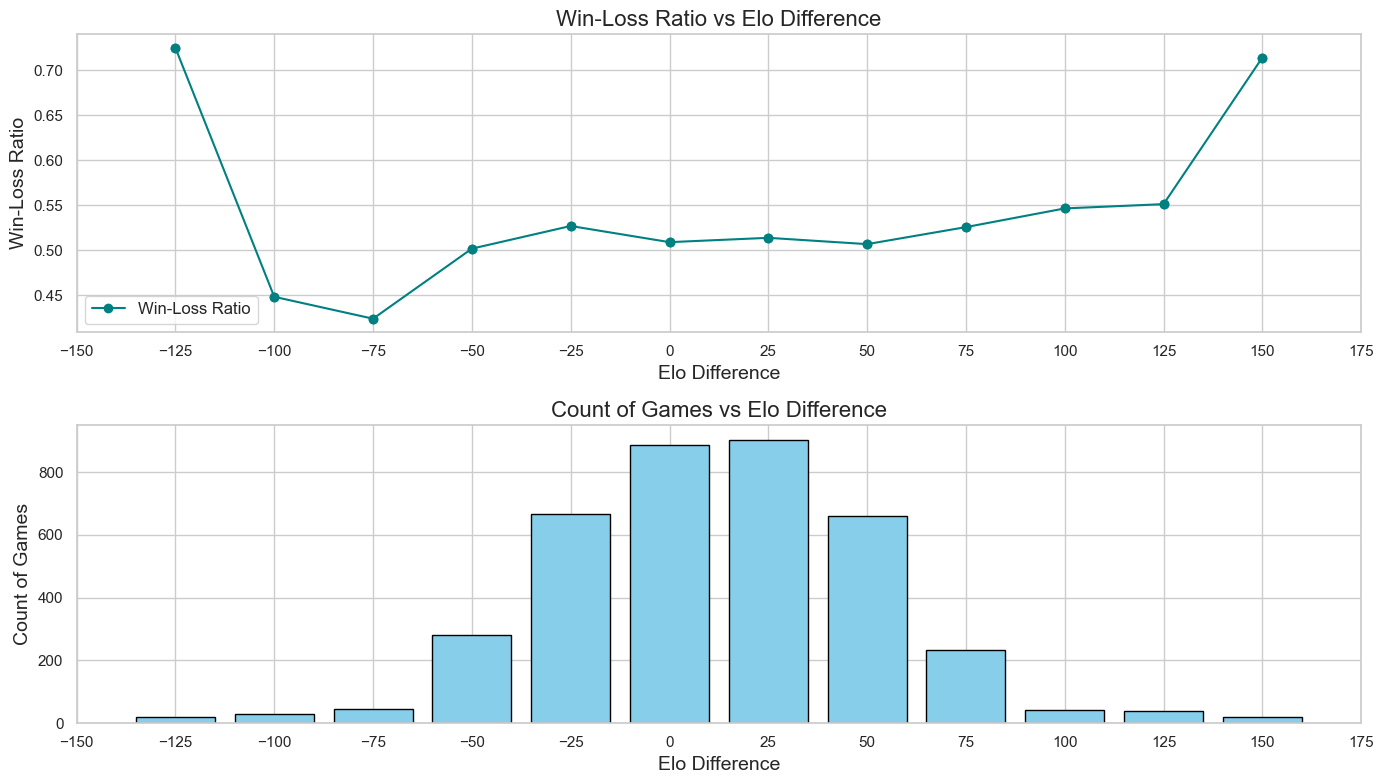

In [1807]:
# Plotting
plt.figure(figsize=(14, 8))

# Plot 1: Win-Loss Ratio
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(binned_summary['BinEdge'], binned_summary['WinLossRatio'], label='Win-Loss Ratio', color='teal', marker='o')
plt.scatter(binned_summary['BinEdge'], binned_summary['WinLossRatio'], color='teal')

# Add labels and title
plt.xlabel('Elo Difference', fontsize=14)
plt.ylabel('Win-Loss Ratio', fontsize=14)
plt.title('Win-Loss Ratio vs Elo Difference', fontsize=16)
plt.legend(fontsize=12)

# Customize gridlines
plt.grid(True)

# Set axis limits
plt.xlim(-150, 175)

# Customize tick steps
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(25))

# Plot 2: Count of Games
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.bar(binned_summary['BinEdge'], binned_summary['Count'], width=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Elo Difference', fontsize=14)
plt.ylabel('Count of Games', fontsize=14)
plt.title('Count of Games vs Elo Difference', fontsize=16)

# Customize gridlines
plt.grid(True)

# Set axis limits
plt.xlim(-150, 175)

# Customize tick steps
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(25))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [1808]:
binned_summary

,BinEdge,WinLossRatio,Count
43,-125.0,0.725000,20
44,-100.0,0.448276,29
45,-75.0,0.423913,46
46,-50.0,0.501786,280
47,-25.0,0.526987,667
48,0.0,0.509019,887
49,25.0,0.513827,904
50,50.0,0.506818,660
51,75.0,0.525751,233
52,100.0,0.546512,43


In [1809]:
# Define bin edges
bin_step = 100
bin_edges = np.arange(
    results_by_elo['MyElo'].min() - (results_by_elo['MyElo'].min() % bin_step) - bin_step,
    results_by_elo['MyElo'].max() + bin_step + 1,
    bin_step
)

# Bin the MyElo values
results_by_elo['EloBin'] = pd.cut(results_by_elo['MyElo'], bins=bin_edges)

# Calculate average win-loss ratio for each Elo bin
binned_summary = results_by_elo.groupby('EloBin')['WinLossRatio'].mean().reset_index()
binned_summary['Count'] = results_by_elo.groupby('EloBin')['WinLossRatio'].count().values

# Extract bin edges
binned_summary['BinStart'] = binned_summary['EloBin'].apply(lambda x: x.left)
binned_summary['BinEnd'] = binned_summary['EloBin'].apply(lambda x: x.right)
binned_summary['BinEdge'] = binned_summary['BinEnd']

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\352613929.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\352613929.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\4258848068.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\4258848068.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



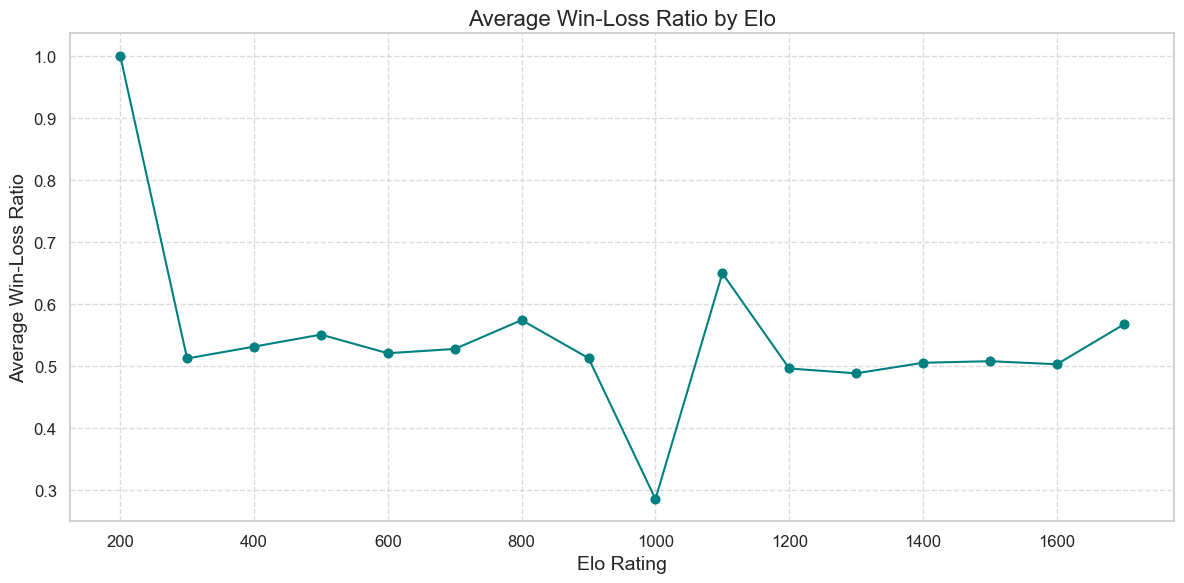

In [1810]:
# Define bin edges
bin_step = 100
bin_edges = np.arange(
    results_by_elo['MyElo'].min() - (results_by_elo['MyElo'].min() % bin_step) - bin_step,
    results_by_elo['MyElo'].max() + bin_step + 1,
    bin_step
)

# Bin the MyElo values
results_by_elo['EloBin'] = pd.cut(results_by_elo['MyElo'], bins=bin_edges)

# Calculate average win-loss ratio for each Elo bin
binned_summary = results_by_elo.groupby('EloBin')['WinLossRatio'].mean().reset_index()
binned_summary['Count'] = results_by_elo.groupby('EloBin')['WinLossRatio'].count().values

# Extract bin edges
binned_summary['BinStart'] = binned_summary['EloBin'].apply(lambda x: x.left)
binned_summary['BinEnd'] = binned_summary['EloBin'].apply(lambda x: x.right)
binned_summary['BinEdge'] = binned_summary['BinEnd']

# Plotting
plt.figure(figsize=(12, 6))

# Plot the average win-loss ratio by Elo bin edge
plt.plot(binned_summary['BinEdge'], binned_summary['WinLossRatio'], marker='o', color='teal', linestyle='-')
plt.scatter(binned_summary['BinEdge'], binned_summary['WinLossRatio'], color='teal')

# Add labels and title
plt.xlabel('Elo Rating', fontsize=14)
plt.ylabel('Average Win-Loss Ratio', fontsize=14)
plt.title('Average Win-Loss Ratio by Elo', fontsize=16)

# Customize gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Note* I removed all values that had less than 15 becuase I thought the games with less than 15 games played werent that statistically significant and also probably consisted of me playing the same person multiple times. I also removed two points that were at 800-900 points above my own cause it never made sense to me that they could be there and I'm pretty sure they are there from me playing the same person multiple times

**Win-Loss Ratio by Elo Difference**
- not what I was expecting at all, I perform better against better opponents
- I also perform well against opponents around 25 elo points below me

****Termination Count by Type****

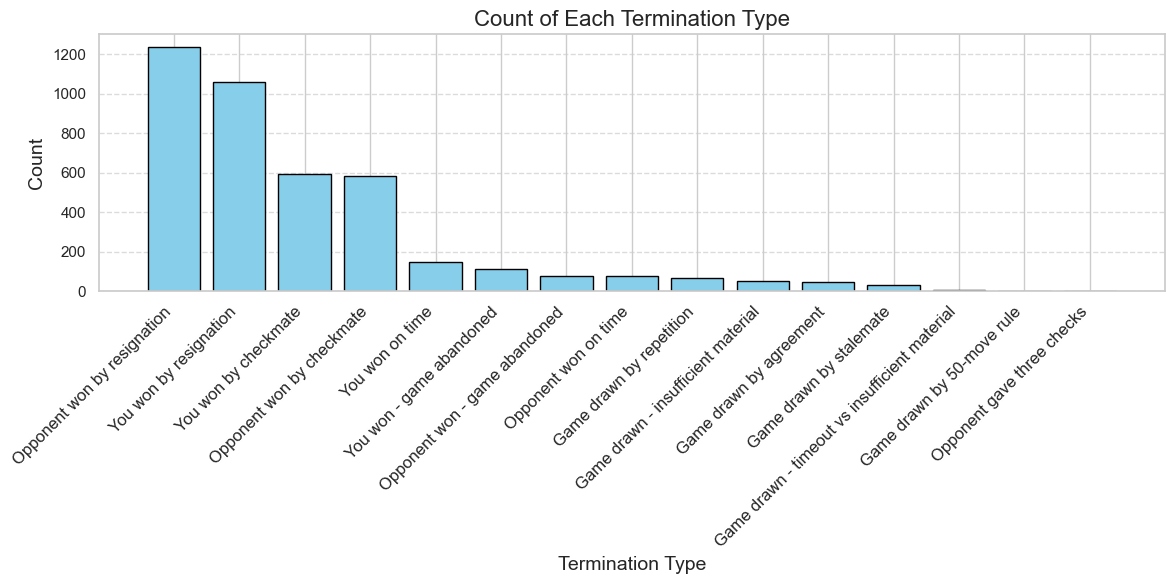

In [1811]:
# Count occurrences of each termination type
termination_counts = chess_games['Termination'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(termination_counts.index, termination_counts.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Termination Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Each Termination Type', fontsize=16)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Customize gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Termination Type Count**
- Most of my games end by me or my opponent resigning, with me resigning almost 200 games more than my opponent, which is much more than the ratio of checkmates from my opponents which means that I resign too many of my games.
- I win on time more than my opponent wins on time so I am better with time management than my opponents are.
- my opponents abandon their games more than I abandon them, a good indicator of my good sportsmanship.

****ANALYSIS BY MOVE****

In [1812]:
# Create new DataFrame with 'GameMoves'
wins_by_moves = pd.DataFrame(chess_games['GameMoves'])

In [1813]:
# Map the result to win-loss ratio
def result_to_ratio(result):
    if result == '1-0':
        return 1
    elif result == '0-1':
        return 0
    elif result == '1/2-1/2':
        return 0.5
    else:
        return None

wins_by_moves['WinLossRatio'] = chess_games['Result'].map(result_to_ratio)

In [1814]:
# Define a function to extract player color
def extract_color(row):
    if row['White'] == 'hassanedwan':
        return "White"
    elif row['Black'] == 'hassanedwan':
        return "Black"
    return "Unknown"  # In case neither color matches

# Apply the function to each row and create the 'PlayerColor' column
wins_by_moves['PlayerColor'] = chess_games.apply(extract_color, axis=1)

In [1815]:
# Calculate the number of moves
wins_by_moves['NumberOfMoves'] = wins_by_moves['GameMoves'].apply(len)

# Define bin edges with a step of 10
bin_step = 10
bin_edges = np.arange(
    wins_by_moves['NumberOfMoves'].min(),
    wins_by_moves['NumberOfMoves'].max() + bin_step,
    bin_step
)

# Bin the number of moves
wins_by_moves['MoveBin'] = pd.cut(wins_by_moves['NumberOfMoves'], bins=bin_edges)

black_wins_by_moves = wins_by_moves[wins_by_moves["PlayerColor"] == "Black"]
white_wins_by_moves = wins_by_moves[wins_by_moves["PlayerColor"] == "White"]

In [1816]:
# Calculate average win-loss ratio for each bin
black_binned_summary = black_wins_by_moves.groupby('MoveBin')['WinLossRatio'].mean().reset_index()
black_binned_summary['Count'] = black_wins_by_moves.groupby('MoveBin')['WinLossRatio'].count().values

#Change the bins to the bin edges
black_binned_summary["BinEdges"] = bin_edges[1:]

#filter out bins with counts less than 10
black_binned_summary = black_binned_summary[black_binned_summary['Count'] > 40]

black_binned_summary

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\1585913386.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\1585913386.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,MoveBin,WinLossRatio,Count,BinEdges
0,"(0, 10]",0.791667,84,10
1,"(10, 20]",0.621212,99,20
2,"(20, 30]",0.723404,141,30
3,"(30, 40]",0.544776,201,40
4,"(40, 50]",0.571161,267,50
5,"(50, 60]",0.468284,268,60
6,"(60, 70]",0.471366,227,70
7,"(70, 80]",0.452381,168,80
8,"(80, 90]",0.479839,124,90
9,"(90, 100]",0.372727,110,100


In [1817]:
# Calculate average win-loss ratio for each bin
white_binned_summary = white_wins_by_moves.groupby('MoveBin')['WinLossRatio'].mean().reset_index()
white_binned_summary['Count'] = white_wins_by_moves.groupby('MoveBin')['WinLossRatio'].count().values

#Change the bins to the bin edges
white_binned_summary["BinEdges"] = bin_edges[1:]

#filter out bins with counts less than 10
white_binned_summary = white_binned_summary[white_binned_summary['Count'] > 40]

white_binned_summary

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\3160961506.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\3160961506.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,MoveBin,WinLossRatio,Count,BinEdges
0,"(0, 10]",0.234375,64,10
1,"(10, 20]",0.504902,102,20
2,"(20, 30]",0.546448,183,30
3,"(30, 40]",0.515021,233,40
4,"(40, 50]",0.456274,263,50
5,"(50, 60]",0.460474,253,60
6,"(60, 70]",0.461712,222,70
7,"(70, 80]",0.534375,160,80
8,"(80, 90]",0.536585,123,90
9,"(90, 100]",0.599057,106,100


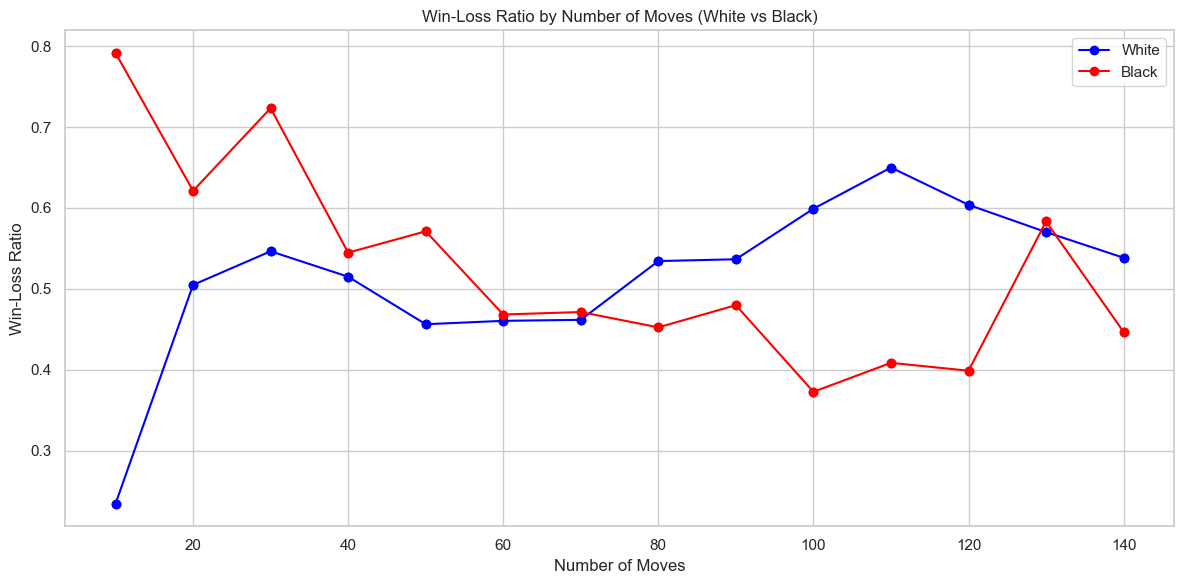

In [1818]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot for White
plt.plot(white_binned_summary['BinEdges'], white_binned_summary['WinLossRatio'], marker='o', linestyle='-', color='blue', label='White')

# Plot for Black
plt.plot(black_binned_summary['BinEdges'], black_binned_summary['WinLossRatio'], marker='o', linestyle='-', color='red', label='Black')

# Scatter plots for better visualization
plt.scatter(white_binned_summary['BinEdges'], white_binned_summary['WinLossRatio'], color='blue')
plt.scatter(black_binned_summary['BinEdges'], black_binned_summary['WinLossRatio'], color='red')

# Add labels and title
plt.xlabel('Number of Moves')
plt.ylabel('Win-Loss Ratio')
plt.title('Win-Loss Ratio by Number of Moves (White vs Black)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Win Loss Ratio by Number of Moves**
- I have a very high winrate on black in games less than 20 moves, and a very low winrate on white with less than 20 moves played, this is an overall trend with white and plact but it is particularly sharp in the first 20 moves.
- On my games as black there is a clear correlation with poorer performance as the game goes on longer, potentially because I play more gambits as black. But I am very successful early on in the game as black, which is very interesting."?
- On my games as white, I perform well between 20-40 moves, poorly in the middle game, 40-80 moves, and particularly well in the late game 80-120 moves

In [1819]:
# Limit GameMoves to only the first 10 moves of each sequence
white_wins_by_moves['GameMoves'] = white_wins_by_moves['GameMoves'].apply(lambda x: x[:10])
black_wins_by_moves['GameMoves'] = black_wins_by_moves['GameMoves'].apply(lambda x: x[:10])


# Convert lists to tuples for hashability
white_wins_by_moves['GameMoves'] = white_wins_by_moves['GameMoves'].apply(tuple)
black_wins_by_moves['GameMoves'] = black_wins_by_moves['GameMoves'].apply(tuple)


# Calculate the average win/loss ratio for each unique set of moves
white_avg_win_loss = white_wins_by_moves.groupby('GameMoves')['WinLossRatio'].mean()
black_avg_win_loss = black_wins_by_moves.groupby('GameMoves')['WinLossRatio'].mean()


# Get move counts
white_move_counts = white_wins_by_moves['GameMoves'].value_counts()
black_move_counts = black_wins_by_moves['GameMoves'].value_counts()

# Combine the counts with the average win/loss ratio
white_summary = pd.DataFrame({
    'GameMoves': white_move_counts.index,
    'MoveCounts': white_move_counts.values,
    'AvgWinLossRatio': white_avg_win_loss[white_move_counts.index].values
}).reset_index(drop=True)

black_summary = pd.DataFrame({
    'GameMoves': black_move_counts.index,
    'MoveCounts': black_move_counts.values,
    'AvgWinLossRatio': black_avg_win_loss[black_move_counts.index].values
}).reset_index(drop=True)

# Filter out rows where MoveCounts is greater than 10
white_summary = white_summary[white_summary['MoveCounts'] >= 10]
black_summary = black_summary[black_summary['MoveCounts'] >= 10]

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\3998702633.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\3998702633.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hedwa\AppData\Local\Temp\ipykernel_40596\3998702633.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [1820]:
# Sample game_moves data
game_moves = white_summary["GameMoves"]

# Add numerical prefixes and include all previous moves
updated_game_moves = []
for moves in game_moves:
    updated_moves = []
    for idx in range(len(moves)):
        previous_moves = ' '.join(f'{i + 1}.{moves[i]}' for i in range(idx + 1))
        updated_moves.append(previous_moves)
    updated_game_moves.append(tuple(updated_moves))
    
game_moves = updated_game_moves


In [1821]:
import plotly.graph_objects as go

# Initialize empty lists for nodes and links
nodes = set()
links = []
path_dict = {}

# Extract nodes, links, and group paths
for moves in game_moves:
    for i in range(len(moves) - 1):
        src = moves[i]
        tgt = moves[i + 1]
        nodes.add(src)
        nodes.add(tgt)
        path = tuple(moves[:i+1])
        if path not in path_dict:
            path_dict[path] = []
        path_dict[path].append((src, tgt))

# Create node indices
node_list = list(nodes)
node_indices = {node: idx for idx, node in enumerate(node_list)}

#Create the node list labels
#get the last move from each node to display
def extract_last_move(node):
    # Split the string by spaces and take the last segment
    segments = node.split(' ')
    if segments:
        return segments[-1]  # Return the last segment
    return node  # If no segments, return the original node

# Apply the function to node_list
node_list_label = [extract_last_move(node) for node in node_list]

# Create source, target, and value lists
source_indices = []
target_indices = []
values = []

# Flatten the path_dict to get source-target pairs and their frequencies
for path, pairs in path_dict.items():
    for src, tgt in pairs:
        source_idx = node_indices[src]
        target_idx = node_indices[tgt]
        source_indices.append(source_idx)
        target_indices.append(target_idx)
        values.append(pairs.count((src, tgt)))

# Create Plotly Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=node_list_label
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
)])

fig.update_layout(title_text="Sankey Diagram of Game Moves as White", font_size=10)
fig.show()


In [1822]:
# Sample game_moves data
game_moves = black_summary["GameMoves"]

# Add numerical prefixes and include all previous moves
updated_game_moves = []
for moves in game_moves:
    updated_moves = []
    for idx in range(len(moves)):
        previous_moves = ' '.join(f'{i + 1}.{moves[i]}' for i in range(idx + 1))
        updated_moves.append(previous_moves)
    updated_game_moves.append(tuple(updated_moves))
    
game_moves = updated_game_moves


In [1823]:
import pandas as pd
import plotly.graph_objects as go

# Initialize empty lists for nodes and links
nodes = set()
links = []
path_dict = {}

# Extract nodes, links, and group paths
for moves in game_moves:
    for i in range(len(moves) - 1):
        src = moves[i]
        tgt = moves[i + 1]
        nodes.add(src)
        nodes.add(tgt)
        path = tuple(moves[:i+1])
        if path not in path_dict:
            path_dict[path] = []
        path_dict[path].append((src, tgt))

# Create node indices
node_list = list(nodes)
node_indices = {node: idx for idx, node in enumerate(node_list)}

#Create the node list labels
#get the last move from each node to display
def extract_last_move(node):
    # Split the string by spaces and take the last segment
    segments = node.split(' ')
    if segments:
        return segments[-1]  # Return the last segment
    return node  # If no segments, return the original node

# Apply the function to node_list
node_list_label = [extract_last_move(node) for node in node_list]

# Create source, target, and value lists
source_indices = []
target_indices = []
values = []

# Flatten the path_dict to get source-target pairs and their frequencies
for path, pairs in path_dict.items():
    for src, tgt in pairs:
        source_idx = node_indices[src]
        target_idx = node_indices[tgt]
        source_indices.append(source_idx)
        target_indices.append(target_idx)
        values.append(pairs.count((src, tgt)))

# Create Plotly Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=node_list_label
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
)])

fig.update_layout(title_text="Sankey Diagram of Game Moves as Black", font_size=10)
fig.show()
